# 시험을 부활시키려는 이유가 무엇인가?
    시험 폐지 이후 실제로 사교육비가 감소하지 않아서?
    사교육비 감소세보다 학생들의 학업성취 수준 감소가 더 커서?

# 시험 폐지 이후 실제로 사교육비가 감소하지 않아서

## 사용 데이터
* 서울시 사교육비 지출 현황
    * 사교육비 
        * 초, 중, 고 학생들이 학교 정규 교육과정 이외에 학교 밖에서 받는 보충교육에 개인이 지출하는 비용
        * 학원, 개인 및 그룹과외, 방문 학습지, 인터넷 및 통신강의 수강료 (교재비 포함)
    * 학생 1인당 월평균 사교육비 대상은 전체학생 (사교육을 받지 않은 학생도 포함)
        * 증가한다면 사교육비 받는 학생의 증가로 인한 결과인가
        * 사교육 받는 학생 수는 그대로인에 금액이 증가하는 것인가

--------------------

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt
from glob import glob
import folium
import json
import requests

/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
file_path = glob("./dataset/서울 사교육비 지출.csv")[0]

In [4]:
seoul_private_edu_cost_df = pd.read_csv(file_path)
seoul_private_edu_cost_df

,시점,평균,평균.1,초등학교,초등학교.1,중학교,중학교.1,고등학교,고등학교.1,일반고,일반고.1
0,시점,학생 1인당 월평균 사교육비 (만원),사교육 참여율 (%),학생 1인당 월평균 사교육비 (만원),사교육 참여율 (%),학생 1인당 월평균 사교육비 (만원),사교육 참여율 (%),학생 1인당 월평균 사교육비 (만원),사교육 참여율 (%),학생 1인당 월평균 사교육비 (만원),사교육 참여율 (%)
1,2009,33.1,79.6,30.5,88.8,32.6,76.9,37.7,67.3,43.3,74.2
2,2010,32.1,77.5,29.6,88.8,30.9,72.2,37.2,64.9,42.0,70.6
3,2011,32.8,77.0,30.4,87.7,31.8,73.4,37.4,64.2,42.7,71.2
4,2012,31.2,73.5,26.1,82.0,34.0,72.7,36.1,61.8,41.1,68.2
5,2013,32.8,75.0,28.4,84.8,34.9,74.7,37.1,61.6,42.7,68.4
6,2014,33.5,74.4,30.0,84.3,34.9,73.3,37.1,61.3,42.1,67.4
7,2015,33.8,74.3,29.6,82.9,35.5,74.1,38.3,61.8,43.6,68.2
8,2016,35.2,73.7,29.9,84.2,37.0,69.9,41.7,61.5,47.0,66.7
9,2017,39.1,77.6,34.1,86.5,41.7,76.0,44.5,65.5,51.8,72.6


In [131]:
# 컬럼 이름 변경
seoul_private_edu_cost_df.columns = ["시점", "1인당 월평균 사교육비(만원) : 평균", "평균 사교육 참여율(%)", 
                                     "1인당 월평균 사교육비(만원) : 초등학교", "초등 사교육 참여율(%)", 
                                     "1인당 월평균 사교육비(만원) : 중학교", "중등 사교육 참여율(%)", 
                                     "1인당 월평균 사교육비(만원) : 고등학교", "고등 사교육 참여율(%)", 
                                     "1인당 월평균 사교육비(만원) : 일반고", "일반고 사교육 참여율(%)"]

# 2011~2021년 외 데이터 삭제
seoul_private_edu_cost_df = seoul_private_edu_cost_df.drop([0, 1, 2])
seoul_private_edu_cost_df

,시점,1인당 월평균 사교육비(만원) : 평균,평균 사교육 참여율(%),1인당 월평균 사교육비(만원) : 초등학교,초등 사교육 참여율(%),1인당 월평균 사교육비(만원) : 중학교,중등 사교육 참여율(%),1인당 월평균 사교육비(만원) : 고등학교,고등 사교육 참여율(%),1인당 월평균 사교육비(만원) : 일반고,일반고 사교육 참여율(%)
3,2011,32.8,77.0,30.4,87.7,31.8,73.4,37.4,64.2,42.7,71.2
4,2012,31.2,73.5,26.1,82.0,34.0,72.7,36.1,61.8,41.1,68.2
5,2013,32.8,75.0,28.4,84.8,34.9,74.7,37.1,61.6,42.7,68.4
6,2014,33.5,74.4,30.0,84.3,34.9,73.3,37.1,61.3,42.1,67.4
7,2015,33.8,74.3,29.6,82.9,35.5,74.1,38.3,61.8,43.6,68.2
8,2016,35.2,73.7,29.9,84.2,37.0,69.9,41.7,61.5,47.0,66.7
9,2017,39.1,77.6,34.1,86.5,41.7,76.0,44.5,65.5,51.8,72.6
10,2018,41.1,79.9,36.5,89.5,41.5,74.8,48.4,68.3,56.6,74.9
11,2019,45.1,80.0,38.5,87.6,46.3,77.2,55.6,68.9,65.2,77.3
12,2020,43.3,74.6,32.7,76.6,47.5,74.9,58.6,70.7,66.9,76.6


In [132]:
# 시점 컬럼을 set_index()
seoul_private_edu_cost_df = seoul_private_edu_cost_df.set_index('시점')
seoul_private_edu_cost_df.head()

,1인당 월평균 사교육비(만원) : 평균,평균 사교육 참여율(%),1인당 월평균 사교육비(만원) : 초등학교,초등 사교육 참여율(%),1인당 월평균 사교육비(만원) : 중학교,중등 사교육 참여율(%),1인당 월평균 사교육비(만원) : 고등학교,고등 사교육 참여율(%),1인당 월평균 사교육비(만원) : 일반고,일반고 사교육 참여율(%)
시점,,,,,,,,,,
2011,32.8,77.0,30.4,87.7,31.8,73.4,37.4,64.2,42.7,71.2
2012,31.2,73.5,26.1,82.0,34.0,72.7,36.1,61.8,41.1,68.2
2013,32.8,75.0,28.4,84.8,34.9,74.7,37.1,61.6,42.7,68.4
2014,33.5,74.4,30.0,84.3,34.9,73.3,37.1,61.3,42.1,67.4
2015,33.8,74.3,29.6,82.9,35.5,74.1,38.3,61.8,43.6,68.2
2016,35.2,73.7,29.9,84.2,37.0,69.9,41.7,61.5,47.0,66.7
2017,39.1,77.6,34.1,86.5,41.7,76.0,44.5,65.5,51.8,72.6
2018,41.1,79.9,36.5,89.5,41.5,74.8,48.4,68.3,56.6,74.9
2019,45.1,80.0,38.5,87.6,46.3,77.2,55.6,68.9,65.2,77.3


In [133]:
# 컬럼에 "사교육비" 단어를 포함하는 조건
condition = seoul_private_edu_cost_df.columns.str.contains("사교육비")
condition

array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

In [135]:
# 사교육 참여율 df
ratio_df = seoul_private_edu_cost_df.loc[:, ~condition]
ratio_df

,평균 사교육 참여율(%),초등 사교육 참여율(%),중등 사교육 참여율(%),고등 사교육 참여율(%),일반고 사교육 참여율(%)
시점,,,,,
2011,77.0,87.7,73.4,64.2,71.2
2012,73.5,82.0,72.7,61.8,68.2
2013,75.0,84.8,74.7,61.6,68.4
2014,74.4,84.3,73.3,61.3,67.4
2015,74.3,82.9,74.1,61.8,68.2
2016,73.7,84.2,69.9,61.5,66.7
2017,77.6,86.5,76.0,65.5,72.6
2018,79.9,89.5,74.8,68.3,74.9
2019,80.0,87.6,77.2,68.9,77.3


In [137]:
ratio_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2011 to 2021
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   평균 사교육 참여율(%)   11 non-null     object
 1   초등 사교육 참여율(%)   11 non-null     object
 2   중등 사교육 참여율(%)   11 non-null     object
 3   고등 사교육 참여율(%)   11 non-null     object
 4   일반고 사교육 참여율(%)  11 non-null     object
dtypes: object(5)
memory usage: 528.0+ bytes


In [138]:
# 데이터 타입 변경
ratio_df = ratio_df.astype('float')
ratio_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2011 to 2021
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   평균 사교육 참여율(%)   11 non-null     float64
 1   초등 사교육 참여율(%)   11 non-null     float64
 2   중등 사교육 참여율(%)   11 non-null     float64
 3   고등 사교육 참여율(%)   11 non-null     float64
 4   일반고 사교육 참여율(%)  11 non-null     float64
dtypes: float64(5)
memory usage: 528.0+ bytes


In [136]:
# 사교육 비용 df
cost_df = seoul_private_edu_cost_df.loc[:, condition]
cost_df

,1인당 월평균 사교육비(만원) : 평균,1인당 월평균 사교육비(만원) : 초등학교,1인당 월평균 사교육비(만원) : 중학교,1인당 월평균 사교육비(만원) : 고등학교,1인당 월평균 사교육비(만원) : 일반고
시점,,,,,
2011,32.8,30.4,31.8,37.4,42.7
2012,31.2,26.1,34.0,36.1,41.1
2013,32.8,28.4,34.9,37.1,42.7
2014,33.5,30.0,34.9,37.1,42.1
2015,33.8,29.6,35.5,38.3,43.6
2016,35.2,29.9,37.0,41.7,47.0
2017,39.1,34.1,41.7,44.5,51.8
2018,41.1,36.5,41.5,48.4,56.6
2019,45.1,38.5,46.3,55.6,65.2


In [153]:
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2011 to 2021
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   1인당 월평균 사교육비(만원) : 평균    11 non-null     object
 1   1인당 월평균 사교육비(만원) : 초등학교  11 non-null     object
 2   1인당 월평균 사교육비(만원) : 중학교   11 non-null     object
 3   1인당 월평균 사교육비(만원) : 고등학교  11 non-null     object
 4   1인당 월평균 사교육비(만원) : 일반고   11 non-null     object
dtypes: object(5)
memory usage: 528.0+ bytes


In [154]:
# 데이터 타입 변경
cost_df = cost_df.astype('float')
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2011 to 2021
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   1인당 월평균 사교육비(만원) : 평균    11 non-null     float64
 1   1인당 월평균 사교육비(만원) : 초등학교  11 non-null     float64
 2   1인당 월평균 사교육비(만원) : 중학교   11 non-null     float64
 3   1인당 월평균 사교육비(만원) : 고등학교  11 non-null     float64
 4   1인당 월평균 사교육비(만원) : 일반고   11 non-null     float64
dtypes: float64(5)
memory usage: 528.0+ bytes


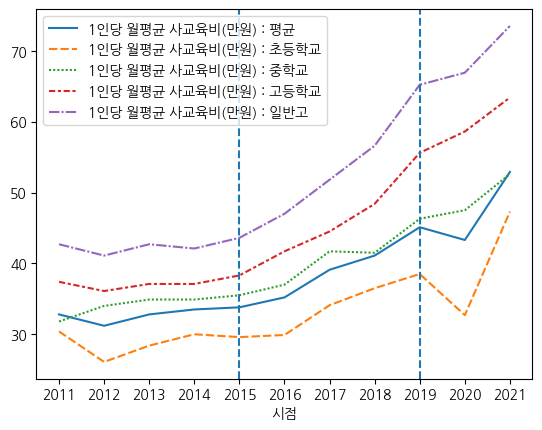

In [158]:
# 서울 1인당 월평균 사교육비 시각화
sns.lineplot(cost_df)
plt.axvline(x = '2015',linestyle='--')
plt.axvline(x = '2019',linestyle='--')

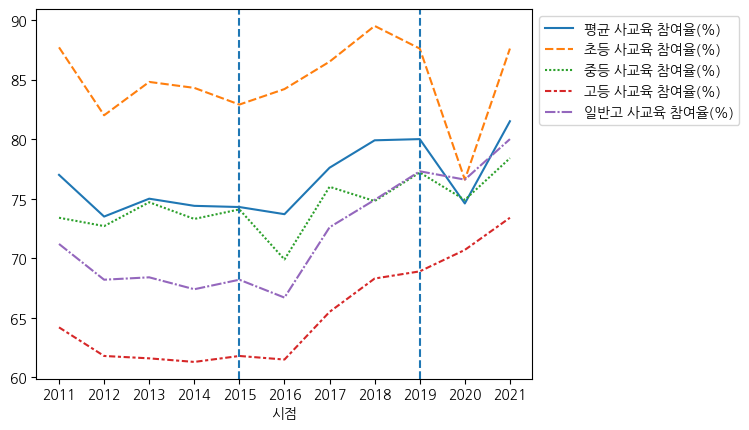

In [159]:
# 서울 사교육 참여율 시각화
sns.lineplot(ratio_df)
plt.axvline(x = '2015',linestyle='--')
plt.axvline(x = '2019',linestyle='--')
plt.legend(bbox_to_anchor=(1,1))

## 진행 상항
* 15년 고등학교 신입생부터 영어 절대평가
* 19년 고등학교 신입생부터 문이과 통합


* 교육비의 경우 15년부터 상승세를 보이는데 영어 절대평가 영향인지?
    * 정은님의 영어 지출현황 참고해보기
    
    
* 19년도 초등학생에게 무슨일이 있었나?
* 더 다양한 시각화 필요

# 사교육비 감소보다 학업성취도 감소 비용이 더 커서

## 사용 데이터
* 서울시 학업 성취도 평가 추이
* 학업 중단율 통계 추이
    * 학업중단율 : (학업중단자수/학생수)*100
    * 학업중단자 : 질병, 학교부적응, 가사, 기타 등의 사유로 인한 휴학, 자퇴, 제적, 퇴학 등에 의해 학업을 중단한 자
    * 초등학교와 중학교는 유예 및 면제자를 학업중단자로 봄
    * 고등학교의 학업중단사유는 자퇴(질병, 가사, 부적응, 해외출국, 기타), 퇴학(품행)임
    * 학업중단자에 사망자는 포함되지 않음
    * 구분 연도는 학년도임(전년도 3월1일부터 당해년도 2월말까지를 한 학년도로 봄)
    * 2010학년도부터 인정유학, 해외이주, 파견동행이 학업중단자에 포함됨
* 국제학업성취도 평가(PISA)를 이용하여 국가간 비교

## 학업 중단율

In [5]:
stop_school = pd.read_excel("./dataset/서울 학업중단율.xlsx")
stop_school

,시점,소계 초등학교 학생수,소계 중학교 학생수,소계 고등학교 학생수,종로구 초등학교 학생수,종로구 중학교 학생수,종로구 고등학교 학생수,중구 초등학교 학생수,중구 중학교 학생수,중구 고등학교 학생수,...,서초구 고등학교 학업중단율,강남구 초등학교 학업중단율,강남구 중학교 학업중단율,강남구 고등학교 학업중단율,송파구 초등학교 학업중단율,송파구 중학교 학업중단율,송파구 고등학교 학업중단율,강동구 초등학교 학업중단율,강동구 중학교 학업중단율,강동구 고등학교 학업중단율
0,시점,학생수 (명),학생수 (명),학생수 (명),학생수 (명),학생수 (명),학생수 (명),학생수 (명),학생수 (명),학생수 (명),...,학업중단율 (%),학업중단율 (%),학업중단율 (%),학업중단율 (%),학업중단율 (%),학업중단율 (%),학업중단율 (%),학업중단율 (%),학업중단율 (%),학업중단율 (%)
1,시점,소계,소계,소계,종로구,종로구,종로구,중구,중구,중구,...,서초구,강남구,강남구,강남구,송파구,송파구,송파구,강동구,강동구,강동구
2,시점,초등학교,중학교,고등학교,초등학교,중학교,고등학교,초등학교,중학교,고등학교,...,고등학교,초등학교,중학교,고등학교,초등학교,중학교,고등학교,초등학교,중학교,고등학교
3,2011,535948,330219,353632,7714,5086,14380,6948,3845,10447,...,2.3,3.52,3.05,2.33,1.55,1.53,2.05,0.83,1.03,2.22
4,2012,502000,315241,344391,7140,4878,13853,6512,3513,9914,...,2.24,2.97,2.9,2.34,1.55,1.37,1.82,0.76,0.89,2.05
5,2013,469392,304251,334123,6561,4700,13538,6066,3266,9600,...,2.27,2.96,2.58,2,1.48,1.49,1.46,0.71,0.85,1.74
6,2014,457517,286826,320398,6233,4400,13069,5854,2960,9177,...,1.87,2.61,2.33,1.76,1.48,1.26,1.42,0.6,0.91,1.45
7,2015,450675,263466,308306,6084,3935,12653,5739,2663,8933,...,1.7,1.97,2.01,1.66,1.37,1.29,1.16,0.6,0.79,1.16
8,2016,436121,239912,299556,5686,3453,12131,5474,2281,8163,...,1.91,2.19,2.22,1.7,1.36,1.14,1.31,0.58,0.57,1.25
9,2017,428333,227001,282968,5561,3168,11029,5283,2107,7866,...,2.21,2.27,2.26,1.79,1.58,1.19,1.35,0.77,0.72,1.34


In [193]:
# 필요 없는 행 삭제
stop_school = stop_school.drop([0, 1, 2])
stop_school = stop_school.reset_index(drop=True)
stop_school

,시점,소계 초등학교 학생수,소계 중학교 학생수,소계 고등학교 학생수,종로구 초등학교 학생수,종로구 중학교 학생수,종로구 고등학교 학생수,중구 초등학교 학생수,중구 중학교 학생수,중구 고등학교 학생수,...,서초구 고등학교 학업중단율,강남구 초등학교 학업중단율,강남구 중학교 학업중단율,강남구 고등학교 학업중단율,송파구 초등학교 학업중단율,송파구 중학교 학업중단율,송파구 고등학교 학업중단율,강동구 초등학교 학업중단율,강동구 중학교 학업중단율,강동구 고등학교 학업중단율
0,2011,535948,330219,353632,7714,5086,14380,6948,3845,10447,...,2.3,3.52,3.05,2.33,1.55,1.53,2.05,0.83,1.03,2.22
1,2012,502000,315241,344391,7140,4878,13853,6512,3513,9914,...,2.24,2.97,2.9,2.34,1.55,1.37,1.82,0.76,0.89,2.05
2,2013,469392,304251,334123,6561,4700,13538,6066,3266,9600,...,2.27,2.96,2.58,2,1.48,1.49,1.46,0.71,0.85,1.74
3,2014,457517,286826,320398,6233,4400,13069,5854,2960,9177,...,1.87,2.61,2.33,1.76,1.48,1.26,1.42,0.6,0.91,1.45
4,2015,450675,263466,308306,6084,3935,12653,5739,2663,8933,...,1.7,1.97,2.01,1.66,1.37,1.29,1.16,0.6,0.79,1.16
5,2016,436121,239912,299556,5686,3453,12131,5474,2281,8163,...,1.91,2.19,2.22,1.7,1.36,1.14,1.31,0.58,0.57,1.25
6,2017,428333,227001,282968,5561,3168,11029,5283,2107,7866,...,2.21,2.27,2.26,1.79,1.58,1.19,1.35,0.77,0.72,1.34
7,2018,424800,216330,259554,5507,2945,10016,5226,1986,7539,...,2.18,2.74,2.46,2.16,1.47,1.22,1.73,0.75,0.89,1.33
8,2019,422293,207413,236689,5463,2854,9046,5181,1876,7058,...,2.07,3.02,2.63,2.19,1.49,1.26,1.71,0.82,0.76,1.74
9,2020,409536,207081,224316,5192,2793,8467,4990,1845,6731,...,1.41,1.23,1.53,1.28,0.91,1.01,1.05,0.5,0.52,1.12


In [194]:
stop_school = stop_school.set_index("시점")
stop_school

,소계 초등학교 학생수,소계 중학교 학생수,소계 고등학교 학생수,종로구 초등학교 학생수,종로구 중학교 학생수,종로구 고등학교 학생수,중구 초등학교 학생수,중구 중학교 학생수,중구 고등학교 학생수,용산구 초등학교 학생수,...,서초구 고등학교 학업중단율,강남구 초등학교 학업중단율,강남구 중학교 학업중단율,강남구 고등학교 학업중단율,송파구 초등학교 학업중단율,송파구 중학교 학업중단율,송파구 고등학교 학업중단율,강동구 초등학교 학업중단율,강동구 중학교 학업중단율,강동구 고등학교 학업중단율
시점,,,,,,,,,,,,,,,,,,,,,
2011,535948,330219,353632,7714,5086,14380,6948,3845,10447,9925,...,2.3,3.52,3.05,2.33,1.55,1.53,2.05,0.83,1.03,2.22
2012,502000,315241,344391,7140,4878,13853,6512,3513,9914,9423,...,2.24,2.97,2.9,2.34,1.55,1.37,1.82,0.76,0.89,2.05
2013,469392,304251,334123,6561,4700,13538,6066,3266,9600,8763,...,2.27,2.96,2.58,2,1.48,1.49,1.46,0.71,0.85,1.74
2014,457517,286826,320398,6233,4400,13069,5854,2960,9177,8529,...,1.87,2.61,2.33,1.76,1.48,1.26,1.42,0.6,0.91,1.45
2015,450675,263466,308306,6084,3935,12653,5739,2663,8933,8210,...,1.7,1.97,2.01,1.66,1.37,1.29,1.16,0.6,0.79,1.16
2016,436121,239912,299556,5686,3453,12131,5474,2281,8163,7923,...,1.91,2.19,2.22,1.7,1.36,1.14,1.31,0.58,0.57,1.25
2017,428333,227001,282968,5561,3168,11029,5283,2107,7866,7624,...,2.21,2.27,2.26,1.79,1.58,1.19,1.35,0.77,0.72,1.34
2018,424800,216330,259554,5507,2945,10016,5226,1986,7539,7460,...,2.18,2.74,2.46,2.16,1.47,1.22,1.73,0.75,0.89,1.33
2019,422293,207413,236689,5463,2854,9046,5181,1876,7058,7273,...,2.07,3.02,2.63,2.19,1.49,1.26,1.71,0.82,0.76,1.74


In [201]:
stop_school.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2011 to 2020
Columns: 234 entries, 소계 초등학교 학생수 to 강동구 고등학교 학업중단율
dtypes: object(234)
memory usage: 18.4+ KB


In [204]:
stop_school = stop_school.astype("float")
stop_school.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2011 to 2020
Columns: 234 entries, 소계 초등학교 학생수 to 강동구 고등학교 학업중단율
dtypes: float64(234)
memory usage: 18.4+ KB


In [205]:
# 초등학교 학업 중단율 조건
e_condition = stop_school.columns.str.contains("초등학교 학업중단율")
# 중학교 학업 중단율 조건
m_condition = stop_school.columns.str.contains("중학교 학업중단율")
# 고등학교 학업 중단율 조건
h_condition = stop_school.columns.str.contains("고등학교 학업중단율")

In [206]:
stop_e_school = stop_school.loc[:, e_condition]
stop_m_school = stop_school.loc[:, m_condition]
stop_h_school = stop_school.loc[:, h_condition]

<AxesSubplot:xlabel='시점'>

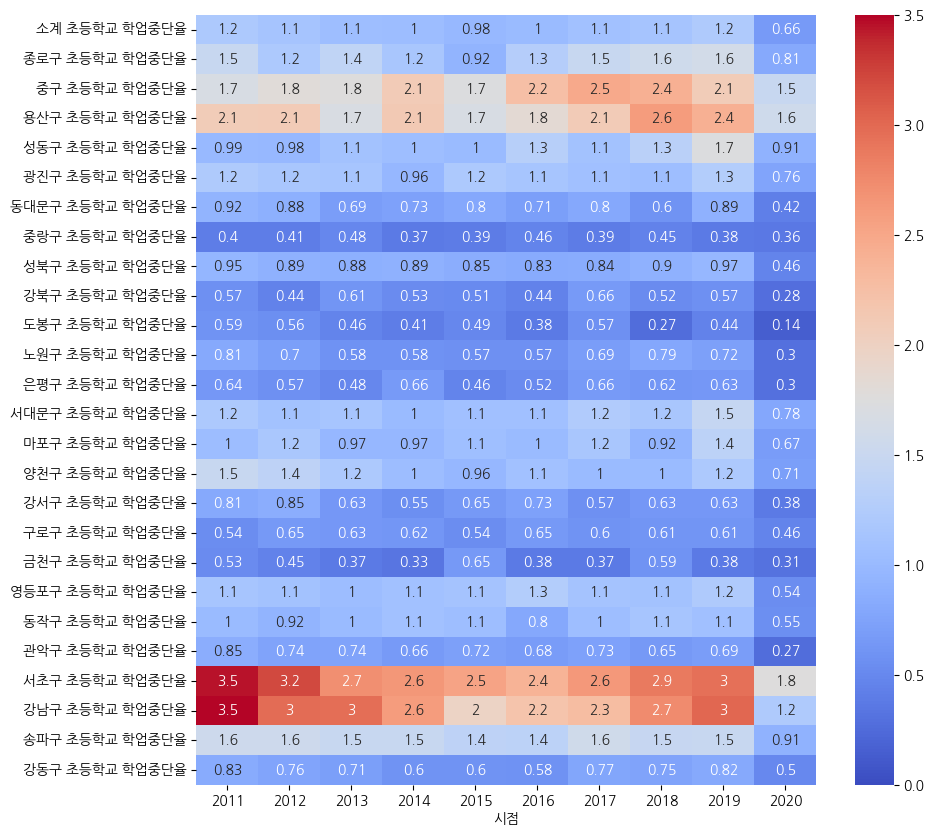

In [224]:
# 서울 구별 초등학교 학업 중단율
plt.figure(figsize=(10, 10))
sns.heatmap(stop_e_school.T, annot=True, cmap="coolwarm", vmin=0, vmax=3.5)

<AxesSubplot:xlabel='시점'>

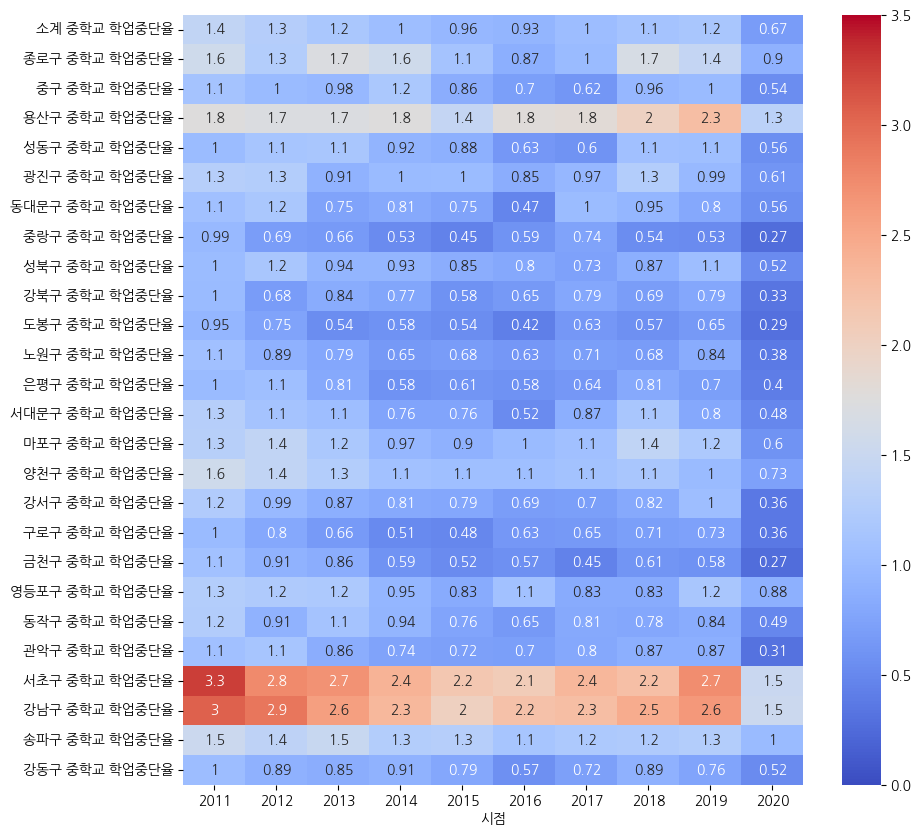

In [223]:
# 서울 구별 중학교 학업 중단율
plt.figure(figsize=(10, 10))
sns.heatmap(stop_m_school.T, annot=True, cmap="coolwarm", vmin=0, vmax=3.5)

<AxesSubplot:xlabel='시점'>

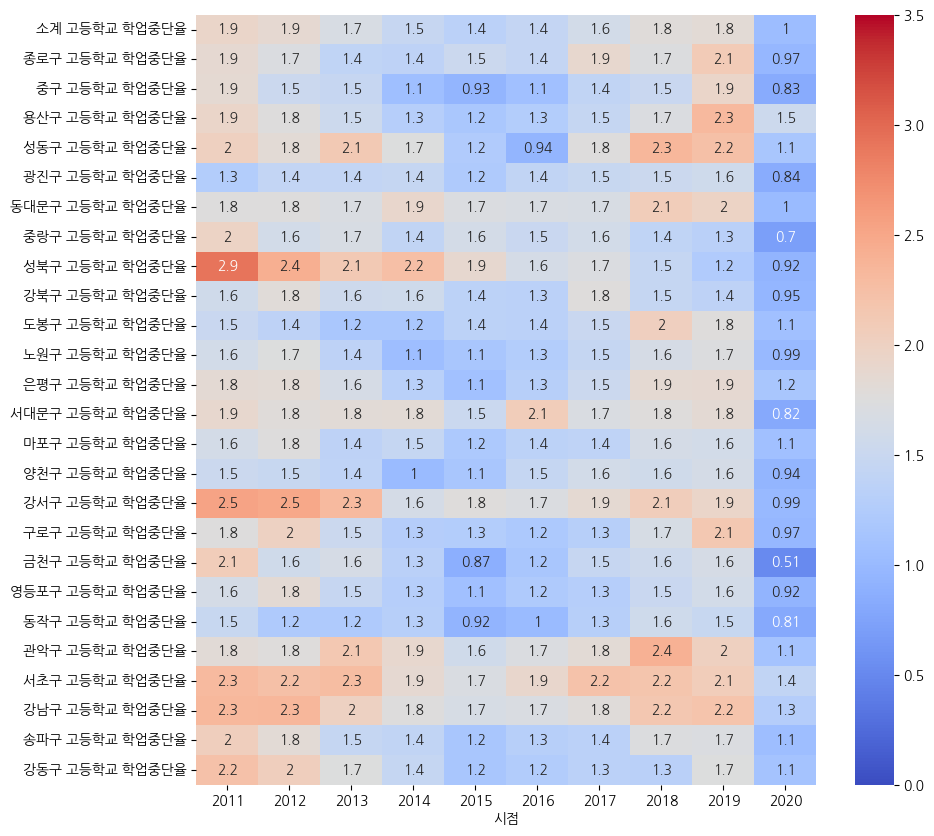

In [222]:
# 서울 구별 고등학교 학업 중단율
plt.figure(figsize=(10, 10))
sns.heatmap(stop_h_school.T, annot=True, cmap="coolwarm", vmin=0, vmax=3.5)

In [311]:
# 20년도 구별 초등학교 중단율
# folium을 위한 전처리 테스트
df_temp = stop_e_school.loc[["2020"]].T
df_temp = df_temp.reset_index()
df_temp = df_temp.rename(columns={'index':'name'})
df_temp = df_temp.drop(0)
df_temp["name"] = df_temp["name"].map(lambda x: x.split()[0])
df_temp

시점,name,2020
1,종로구,0.81
2,중구,1.48
3,용산구,1.56
4,성동구,0.91
5,광진구,0.76
6,동대문구,0.42
7,중랑구,0.36
8,성북구,0.46
9,강북구,0.28
10,도봉구,0.14


In [409]:
# 지도 중앙
center = [37.566345,126.977893]
# 지도 스타일
tiles = ['cartodbpositron', 'Stamen Toner', 'OpenStreetMap', 'Stamen Terrain']

# 지도 설정
m = folium.Map(
    location=[center[0], center[1]],
    zoom_start = 11,
    tiles = tiles[3]
)

# 구별 위경도 json
geo_url = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
response = requests.get(geo_url)
geo_json = json.loads(response.content)


folium.GeoJson(geo_json,
              name="지역구").add_to(m)


# 행정구역 경계 표시, 중단율 색칠
m.choropleth(geo_data=geo_json,
                 name="지역구",
                 data=df_temp,
                 columns=["name", '2020'],
                 key_on="properties.name",
                 fill_color='YlGn',
                 fill_opacity=0.7,
                 line_opacity=0.2
                 )


# 출력
m

## 국제 학업성취도 비교
* OECD 국가 대상
* Averages for age 15 years PISA reading scale: overall reading, by All students [TOTAL] and jurisdiction: 2018, 2015, 2012, 2009, 2006, 2003, and 2000

In [410]:
national_reading = pd.read_excel("./data/국제시험.xls", sheet_name=0)
national_reading[["Average", "Standard Error"]] = national_reading[["Average", "Standard Error"]].astype("float")

In [411]:
national_math = pd.read_excel("./data/국제시험.xls", sheet_name=1)
national_math[["Average", "Standard Error"]] = national_math[["Average", "Standard Error"]].astype("float")

In [412]:
national_science = pd.read_excel("./data/국제시험.xls", sheet_name=2)
national_science[["Average", "Standard Error"]] = national_science[["Average", "Standard Error"]].astype("float")

### 모든 나라들 연도별 테이블

In [413]:
# 연도별 나라별 수학 점수
national_math_g = national_math.groupby(["Year/Study", "Jurisdiction"])[["Average"]].mean()
national_math_g

Average
Year/Study Jurisdiction              
2009       Australia       514.340462
           Austria         495.908655
           Belgium         515.272277
           Canada          526.805153
           Chile           421.060473
...                               ...
2018       Sweden          502.387702
           Switzerland     515.314713
           Turkey          453.507777
           United Kingdom  501.769899
           United States   478.244717

[148 rows x 1 columns]

In [414]:
# 나라를 컬럼으로 unstack()
national_math.groupby(["Year/Study", "Jurisdiction"])[["Average"]].mean().unstack()

Average                                                  \
Jurisdiction   Australia     Austria     Belgium      Canada       Chile   
Year/Study                                                                 
2009          514.340462  495.908655  515.272277  526.805153  421.060473   
2012          504.150766  505.540743  514.529245  518.070400  422.632356   
2015          493.896231  496.742274  506.984362  515.647428  422.671358   
2018          491.360025  498.942314  508.070306  512.016943  417.406556   

                                                                             \
Jurisdiction    Colombia Czech Republic     Denmark     Estonia     Finland   
Year/Study                                                                    
2009          380.848215     492.814094  503.278147  512.104197  540.504348   
2012          376.488601     498.957882  500.026757  520.545522  518.750335   
2015          389.643828     492.325438  511.087632  519.529132  511.076853   
2018          390.932273     499.467651  509.398375  523.414580  507.301362   

              ...                                                      \
Jurisdiction  ...      Poland    Portugal Slovak Republic    Slovenia   
Year/Study    ...                                                       
2009          ...  494.802918  486.888306      496.683420  501.472389   
2012          ...  517.501097  487.063181      481.644744  501.127423   
2015          ...  504.469251  491.626968      475.230105  509.919632   
2018          ...  515.647875  492.487406      486.164854  508.897544   

                                                                             \
Jurisdiction       Spain      Sweden Switzerland      Turkey United Kingdom   
Year/Study                                                                    
2009          483.493140  494.238175  533.960645  445.451340     492.414078   
2012          484.319298  478.260636  530.931004  447.984415     493.934231   
2015          485.843217  493.918122  521.250575  420.453979     492.478531   
2018          481.392613  502.387702  515.314713  453.507777     501.769899   

                            
Jurisdiction United States  
Year/Study                  
2009            487.396521  
2012            481.366786  
2015            469.628492  
2018            478.244717  

[4 rows x 37 columns]

### 과목별 세계 TOP5 만 시각화

In [415]:
# 연도별 읽기 TOP5
reading_top5 = national_reading.sort_values(["Year/Study", "Average"], ascending=[True, False])
reading_top5 = reading_top5.groupby("Year/Study").head()
reading_top5

,Year/Study,Jurisdiction,Average,Standard Error
130,2009,Korea,539.267484,3.460563
120,2009,Finland,535.877985,2.253828
114,2009,Canada,524.241833,1.483177
136,2009,New Zealand,520.880009,2.353263
129,2009,Japan,519.857722,3.465631
92,2012,Japan,538.051485,3.673015
93,2012,Korea,535.790490,3.941383
83,2012,Finland,524.021670,2.381652
89,2012,Ireland,523.173210,2.550366
77,2012,Canada,523.124003,1.926378


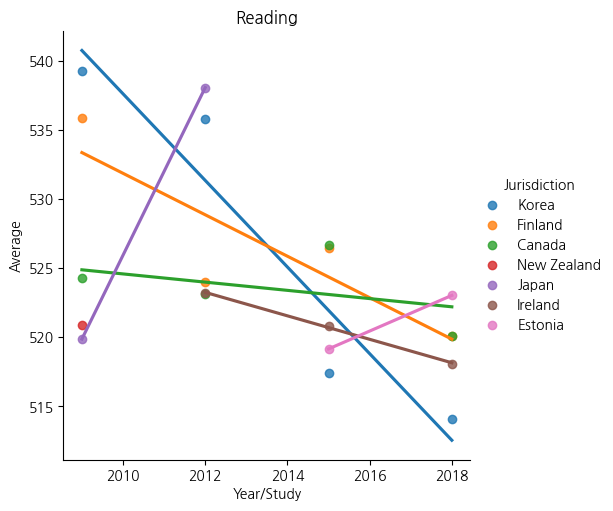

In [416]:
# 하락세를 보이고 있지만, 상위 5위에서 빠진적 없는 대한민국, 점수 역시 500이상 유지
sns.lmplot(reading_top5, x="Year/Study", y="Average", hue='Jurisdiction', 
           ci=None).set(title="Reading")

In [417]:
# 연도별 수학 TOP5
math_top5 = national_math.sort_values(["Year/Study", "Average"], ascending=[True, False])
math_top5 = math_top5.groupby("Year/Study").head()
math_top5

,Year/Study,Jurisdiction,Average,Standard Error
130,2009,Korea,546.228534,4.015360
120,2009,Finland,540.504348,2.166539
144,2009,Switzerland,533.960645,3.297682
129,2009,Japan,528.993093,3.328205
114,2009,Canada,526.805153,1.613570
93,2012,Korea,553.766659,4.579161
92,2012,Japan,536.406919,3.587147
107,2012,Switzerland,530.931004,3.040559
98,2012,Netherlands,522.971758,3.471983
82,2012,Estonia,520.545522,2.021166


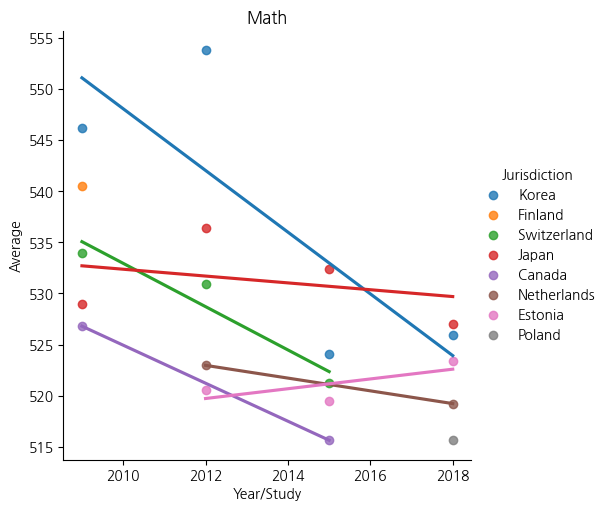

In [418]:
# 하락세를 보이고 있지만, 상위 5위에서 빠진적 없는 대한민국, 점수 역시 500이상 유지
sns.lmplot(math_top5, x="Year/Study", y="Average", hue='Jurisdiction', 
           ci=None).set(title="Math")

In [419]:
# 연도별 과학 TOP5
science_top5 = national_science.sort_values(["Year/Study", "Average"], ascending=[True, False])
science_top5 = science_top5.groupby("Year/Study").head()
science_top5

,Year/Study,Jurisdiction,Average,Standard Error
120,2009,Finland,554.079510,2.335801
129,2009,Japan,539.430993,3.412644
130,2009,Korea,537.986230,3.438713
136,2009,New Zealand,532.006901,2.578755
114,2009,Canada,528.704953,1.621340
92,2012,Japan,546.735601,3.604580
83,2012,Finland,545.441941,2.198721
82,2012,Estonia,541.404758,1.948321
93,2012,Korea,537.787623,3.657511
101,2012,Poland,525.816447,3.123468


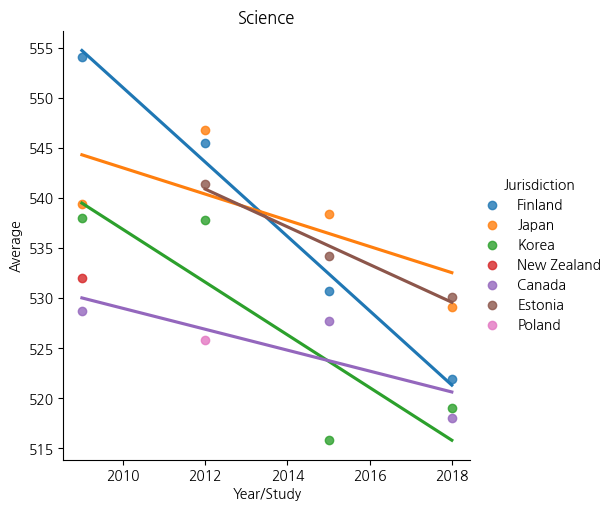

In [420]:
# 하락세를 보이고 있지만 상위 5위에서 빠진적 없는 대한민국, 점수 역시 500이상 유지
sns.lmplot(science_top5, x="Year/Study", y="Average", hue='Jurisdiction', 
           ci=None).set(title="Science")

In [ ]:
sns.

## 진행 상황
* 학업 중단율의 경우 초중고 모두 강남 서초가 상위권인 이유?
* folium 전처리 함수화 하여 연도별 학교별 학업중단율 streamlit 하면 좋아보임


* 국제 학업성취도가 모두 하락세, 5위 밖으로 밀려난적은 없음

# 관계 시각화
    중단율과 사교육비의 관계가 있는가?
    사교육비와 국제 성취도는 관계 있는가?
    사교육비와 국내 성취도는 관계 있는가?